In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.formula.api as smf

from fippy.explainers import Explainer
from fippy.samplers import GaussianSampler
import logging

logging.basicConfig(level=logging.INFO)

# savepath = 'C:/Users/ra59qih/sciebo/LMU/Forschung/Feature_importance/Python/'
# savepath = '~/university/postdoc/research/fi_inference/code/paper_2022_feature_importance_guide/Simulation/Python/'
savepath = ''

# datasets to use
data = pd.read_csv(savepath + 'extrapolation.csv')

data = data[['x1', 'x2', 'x3', 'x4', 'x5', 'y']]
ntrain = int(0.7 * data.shape[0])

xcolumns = ['x1', 'x2', 'x3', 'x4', 'x5']
ycolumn = ['y']
df_train, df_test = data.iloc[0:ntrain,], data.iloc[ntrain:,]
X_train, y_train = df_train[xcolumns], df_train[ycolumn]
X_test, y_test = df_test[xcolumns], df_test[ycolumn]


In [2]:
# fit models
np.random.seed(1)
# mod1 = linear_model.LinearRegression()
# mod1 = linear_model.Lasso(alpha=0)
rf = RandomForestRegressor(n_jobs = -1, min_samples_split = 100)
rf.fit(X_train, y_train)
lm = smf.ols(formula='y ~ x4 + x5 + x4:x5', data=df_train).fit()

scoring = [mean_squared_error, r2_score]
names = ['MSE', 'r2_score']
models = [rf, lm]
m_names = ['RandomForest', 'LinearRegression']

for kk in range(len(models)):
    model = models[kk]
    print('Model: {}'.format(m_names[kk]))
    for jj in np.arange(len(names)):
        print('{}: {}'.format(names[jj], scoring[jj](y_test, model.predict(X_test))))

C:\Users\GDaddy\AppData\Local\r-miniconda\envs\menv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: RandomForest
MSE: 0.0761712682532258
r2_score: 0.9748210876720886
Model: LinearRegression
MSE: 0.01029660744325475
r2_score: 0.996596388874257


In [3]:
# explain model
sampler = GaussianSampler(X_train)
wrk = Explainer(lm.predict, X_train, loss=mean_squared_error, sampler=sampler)

INFO:fippy.samplers.sampler:Sampler initialized. Using following features as categorical []


INFO:root:Ordering : ['x3' 'x2' 'x1' 'x5' 'x4']
INFO:root:Ordering : ['x5' 'x2' 'x1' 'x4' 'x3']
INFO:root:Ordering : ['x5' 'x2' 'x1' 'x3' 'x4']
INFO:root:Ordering : ['x2' 'x4' 'x3' 'x1' 'x5']
INFO:root:Ordering : ['x2' 'x5' 'x4' 'x3' 'x1']
INFO:root:Ordering : ['x5' 'x2' 'x4' 'x3' 'x1']
INFO:root:Ordering : ['x1' 'x5' 'x2' 'x3' 'x4']
INFO:root:Ordering : ['x2' 'x3' 'x5' 'x4' 'x1']
INFO:root:Ordering : ['x1' 'x4' 'x5' 'x3' 'x2']
INFO:root:Ordering : ['x2' 'x3' 'x1' 'x5' 'x4']
INFO:root:Ordering : ['x4' 'x3' 'x2' 'x5' 'x1']
INFO:root:Ordering : ['x5' 'x3' 'x1' 'x2' 'x4']
INFO:root:Ordering : ['x5' 'x4' 'x2' 'x1' 'x3']
INFO:root:Ordering : ['x4' 'x2' 'x1' 'x5' 'x3']
INFO:root:Ordering : ['x4' 'x1' 'x2' 'x3' 'x5']
INFO:root:Ordering : ['x3' 'x4' 'x2' 'x1' 'x5']
INFO:root:Ordering : ['x5' 'x1' 'x3' 'x2' 'x4']
INFO:root:Ordering : ['x1' 'x5' 'x4' 'x3' 'x2']
INFO:root:Ordering : ['x5' 'x4' 'x3' 'x2' 'x1']
INFO:root:Ordering : ['x2' 'x3' 'x5' 'x1' 'x4']
INFO:root:Ordering : ['x5' 'x2' 'x4' 'x1

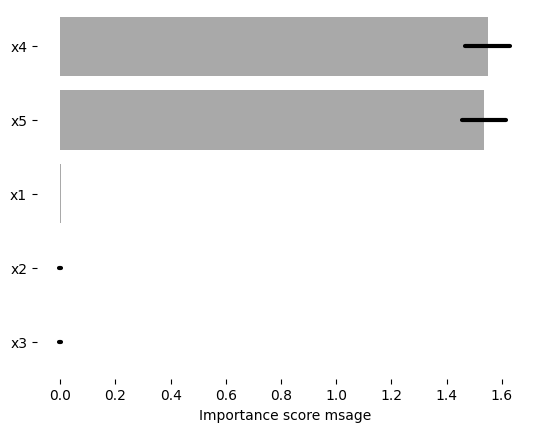

INFO:root:Ordering : ['x5' 'x2' 'x1' 'x3' 'x4']
INFO:fippy.samplers.sampler:Training Sampler for: ['x3' 'x1' 'x4' 'x2'] | ['x5']
INFO:fippy.samplers.sampler:Training ended. Sampler saved.
INFO:fippy.explainers.explainer:Training sampler on ['x3', 'x1', 'x4', 'x2']|['x5']
INFO:fippy.samplers.sampler:Training Sampler for: ['x3' 'x1' 'x4'] | ['x5' 'x2']
INFO:fippy.samplers.sampler:Training ended. Sampler saved.
INFO:fippy.explainers.explainer:Training sampler on ['x3', 'x1', 'x4']|['x5', 'x2']
INFO:fippy.samplers.sampler:Training Sampler for: ['x3' 'x4'] | ['x1' 'x5' 'x2']
INFO:fippy.samplers.sampler:Training ended. Sampler saved.
INFO:fippy.explainers.explainer:Training sampler on ['x3', 'x4']|['x1', 'x5', 'x2']
INFO:fippy.samplers.sampler:Training Sampler for: ['x4'] | ['x3' 'x1' 'x5' 'x2']
INFO:fippy.samplers.sampler:Training ended. Sampler saved.
INFO:fippy.explainers.explainer:Training sampler on ['x4']|['x3', 'x1', 'x5', 'x2']
INFO:fippy.samplers.sampler:Training Sampler for: [] | [

INFO:fippy.samplers.sampler:Training ended. Sampler saved.
INFO:fippy.explainers.explainer:Training sampler on ['x3', 'x1']|['x5', 'x4', 'x2']
INFO:root:Ordering : ['x2' 'x3' 'x4' 'x1' 'x5']
INFO:root:Ordering : ['x3' 'x4' 'x1' 'x2' 'x5']
INFO:root:Ordering : ['x5' 'x4' 'x2' 'x1' 'x3']
INFO:root:Ordering : ['x2' 'x5' 'x4' 'x3' 'x1']
INFO:root:Ordering : ['x3' 'x1' 'x4' 'x5' 'x2']
INFO:root:Ordering : ['x5' 'x3' 'x4' 'x2' 'x1']
INFO:root:Ordering : ['x4' 'x3' 'x1' 'x5' 'x2']
INFO:root:Ordering : ['x2' 'x1' 'x5' 'x3' 'x4']
INFO:root:Ordering : ['x2' 'x3' 'x1' 'x5' 'x4']
INFO:root:Ordering : ['x4' 'x5' 'x2' 'x1' 'x3']
INFO:root:Ordering : ['x5' 'x1' 'x3' 'x4' 'x2']
INFO:root:Ordering : ['x1' 'x3' 'x4' 'x2' 'x5']
INFO:root:Ordering : ['x5' 'x2' 'x3' 'x4' 'x1']
INFO:root:Ordering : ['x3' 'x4' 'x1' 'x5' 'x2']
INFO:root:Ordering : ['x3' 'x1' 'x4' 'x2' 'x5']
INFO:root:Ordering : ['x2' 'x4' 'x3' 'x5' 'x1']
INFO:root:Ordering : ['x4' 'x5' 'x1' 'x2' 'x3']
INFO:root:Ordering : ['x5' 'x2' 'x3' 'x1'

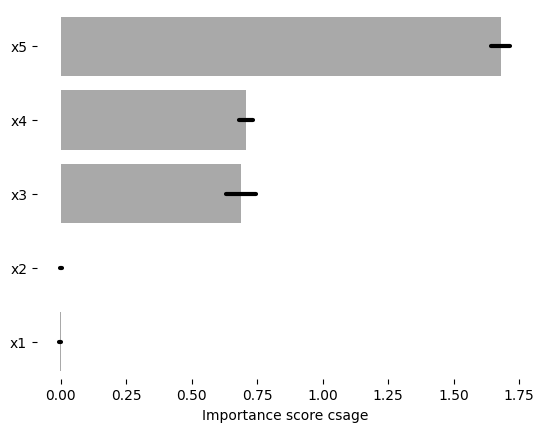

In [4]:
#mSAGE
ex_msage, orderings = wrk.msage(X_test, y_test, nr_resample_marginalize=50, nr_orderings=40, nr_runs = 3)
ex_msage.ex_name = 'msage'
ex_msage.hbarplot()
plt.show()
df_msage = ex_msage.fi_means_quantiles()
df_msage['type'] = 'mSAGE'

# cSAGE 
ex_csage, orderings = wrk.csage(X_test, y_test, nr_resample_marginalize=50, nr_orderings=40, nr_runs = 3)
ex_csage.ex_name = 'csage'
ex_csage.hbarplot()
plt.show()
df_csage = ex_csage.fi_means_quantiles()
df_csage['type'] = 'cSAGE'

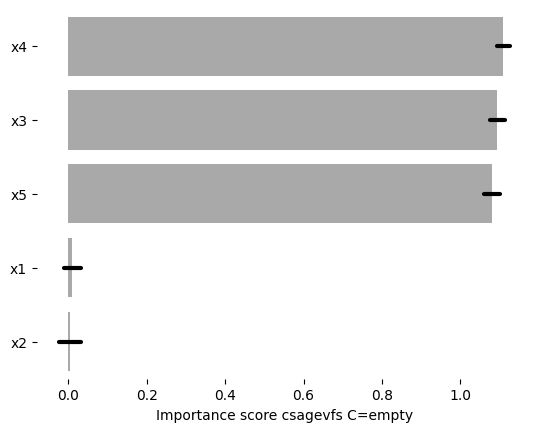

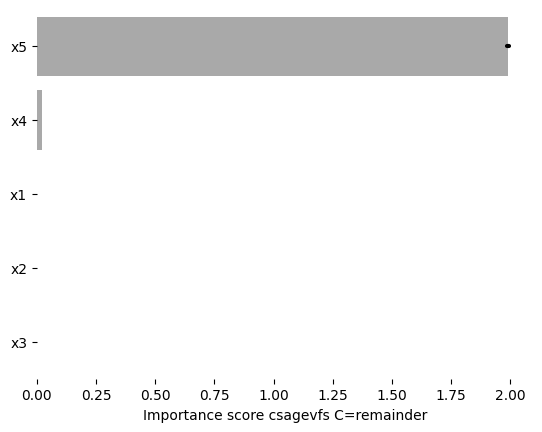

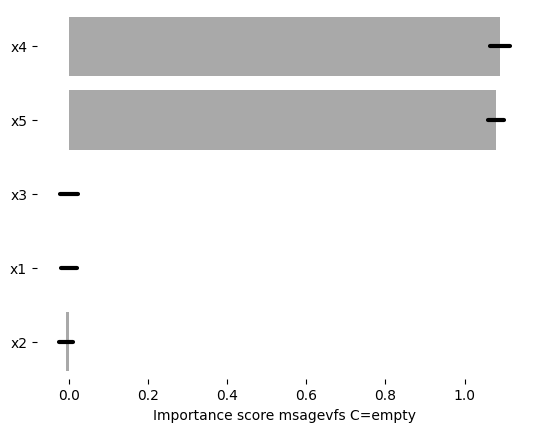

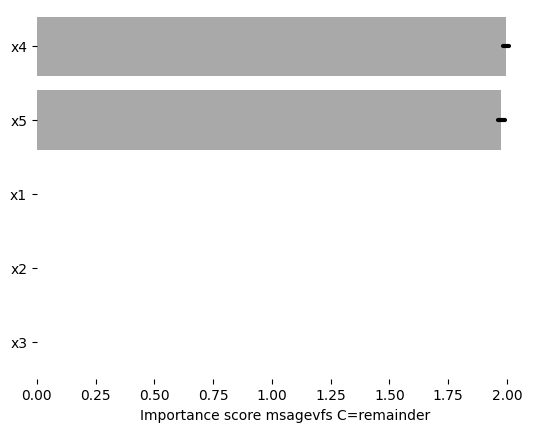

In [5]:
# SAGE value functions
fsoi = list(X_train.columns)
ex_sage = wrk.csagevfs(X_test, y_test, C='empty', nr_resample_marginalize=50)
# ex_sage = wrk.ais_via_contextfunc(fsoi, X_test, y_test, context='empty', marginalize=True)
ex_sage.hbarplot()
plt.show()
df_sage = ex_sage.fi_means_quantiles()
df_sage['type'] = 'conditional v(j)'

ex_sage2 = wrk.csagevfs(X_test, y_test, C='remainder', nr_resample_marginalize=50)
# ex_sage2 = wrk.ais_via_contextfunc(fsoi, X_test, y_test, context='remainder', marginalize=True)
ex_sage2.hbarplot()
plt.show()
df_sage2 = ex_sage2.fi_means_quantiles()
df_sage2['type'] = 'conditional v(-j u j) - v(-j)'

ex_sage_m = wrk.msagevfs(X_test, y_test, C='empty', nr_resample_marginalize=50)
# ex_sage_m = wrk.dis_from_baselinefunc(fsoi, X_test, y_test, baseline='empty', marginalize=True)
ex_sage_m.hbarplot()
plt.show()
df_sage_m = ex_sage_m.fi_means_quantiles()
df_sage_m['type'] = 'marginal v(j)'

ex_sage_m2 = wrk.msagevfs(X_test, y_test, C='remainder', nr_resample_marginalize=50)
# ex_sage_m2 = wrk.dis_from_baselinefunc(fsoi, X_test, y_test, baseline='remainder', marginalize=True)
ex_sage_m2.hbarplot()
plt.show()
df_sage_m2 = ex_sage_m2.fi_means_quantiles()
df_sage_m2['type'] = 'marginal v(-j u j) - v(-j)'

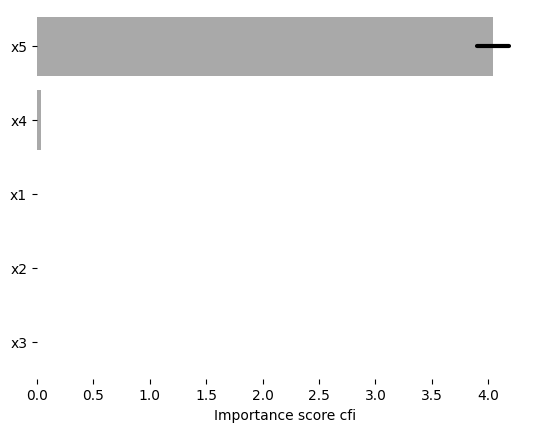

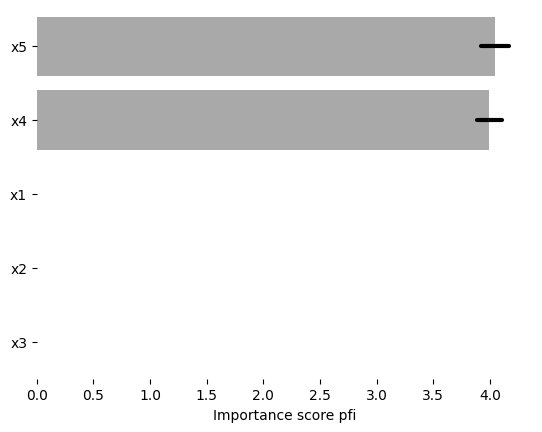

In [6]:
# CFI
ex_cfi = wrk.cfi(X_test, y_test, nr_resample_marginalize=50)
ex_cfi.hbarplot()
plt.show()
df_cfi = ex_cfi.fi_means_quantiles()
df_cfi['type'] = 'cfi'

# PFI
ex_pfi = wrk.pfi(X_test, y_test, nr_resample_marginalize=50)
ex_pfi.hbarplot()
plt.show()
df_pfi = ex_pfi.fi_means_quantiles()
df_pfi['type'] = 'pfi'

#G = ['x1','x3']
#ex_rfi = wrk.rfi(G, X_test, y_test, nr_resample_marginalize=50)
## ex5 = wrk.dis_from_baselinefunc(fsoi, X_test, y_test, baseline='remainder')
## ex6 = wrk.dis_from_baselinefunc(G, X_test, y_test, baseline='remainder')
## scores_rfi = ex5.scores - ex6.scores
## ex_rfi = Explanation(fsoi, scores_rfi)
#ex_rfi.hbarplot()
#plt.show()
#
#df_rfi = ex_rfi.fi_means_quantiles()
#df_rfi['type'] = 'rfi'

In [7]:
df_res_lm = pd.concat([df_pfi, df_cfi, df_sage, df_sage2, df_sage_m, df_sage_m2, df_msage, df_csage]).reset_index()
df_res_lm.to_csv(savepath+'df_res_sim1_lm.csv')